<a href="https://colab.research.google.com/github/poojan14/MNIST/blob/master/mnistwithcoretf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
sess=tf.InteractiveSession()
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


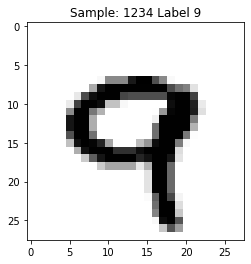

In [0]:
import matplotlib.pyplot as plt
def display_Sample(num):
  print(mnist.train.labels[num])
  label=mnist.train.labels[num].argmax(axis=0)
  image=mnist.train.images[num].reshape([28,28])
  plt.title('Sample: %d Label %d'% (num,label))
  plt.imshow(image,cmap=plt.get_cmap('gray_r'))
  plt.show()
display_Sample(1234)


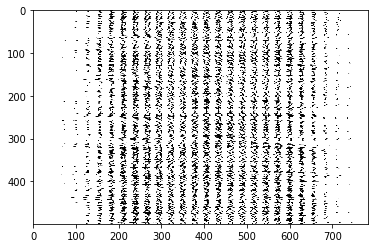

In [0]:
import numpy as np
images=mnist.train.images[0].reshape([1,784])
for i in range(1,500):
  images=np.concatenate((images,mnist.train.images[i].reshape([1,784])))
plt.imshow(images,cmap=plt.get_cmap('gray_r'))
plt.show()


In [0]:
input_images=tf.placeholder(tf.float32,shape=[None,784])
target_labels=tf.placeholder(tf.float32,shape=[None,10])
hidden_nodes=1000
input_weights=tf.Variable(tf.truncated_normal([784,hidden_nodes]))
input_bias=tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights=tf.Variable(tf.truncated_normal([hidden_nodes,10]))
hidden_bias=tf.Variable(tf.zeros([10]))



In [0]:

input_layer = tf.matmul(input_images,input_weights)
hidden_layer = tf.nn.relu(input_layer + input_bias)
digit_weights = tf.matmul(hidden_layer,hidden_weights)+hidden_bias

loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights,labels=target_labels))
optimizer=tf.train.GradientDescentOptimizer(0.6).minimize(loss_function)

In [0]:
correct_prediction=tf.equal(tf.argmax(digit_weights,1),tf.arg_max(target_labels,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))


In [0]:
tf.global_variables_initializer().run()
for x in range(3000):
  batch=mnist.train.next_batch(100)
  optimizer.run(feed_dict={input_images:batch[0],target_labels:batch[1]})
  if((x+1)%100==0):
    print("training epoch "+str(x+1))
    print("accuracy:"+str(accuracy.eval(feed_dict={input_images: mnist.test.images,target_labels: mnist.test.labels})))


training epoch 100
accuracy:0.8634
training epoch 200
accuracy:0.8851
training epoch 300
accuracy:0.8916
training epoch 400
accuracy:0.9071
training epoch 500
accuracy:0.9047
training epoch 600
accuracy:0.9165
training epoch 700
accuracy:0.9147
training epoch 800
accuracy:0.9175
training epoch 900
accuracy:0.9167
training epoch 1000
accuracy:0.9226
training epoch 1100
accuracy:0.9257
training epoch 1200
accuracy:0.9266
training epoch 1300
accuracy:0.9249
training epoch 1400
accuracy:0.9277
training epoch 1500
accuracy:0.9283
training epoch 1600
accuracy:0.9274
training epoch 1700
accuracy:0.9272
training epoch 1800
accuracy:0.9308
training epoch 1900
accuracy:0.9316
training epoch 2000
accuracy:0.9294
training epoch 2100
accuracy:0.9314
training epoch 2200
accuracy:0.9289
training epoch 2300
accuracy:0.9333
training epoch 2400
accuracy:0.9323
training epoch 2500
accuracy:0.9335
training epoch 2600
accuracy:0.9332
training epoch 2700
accuracy:0.9341
training epoch 2800
accuracy:0.9324
t

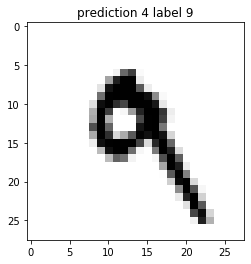

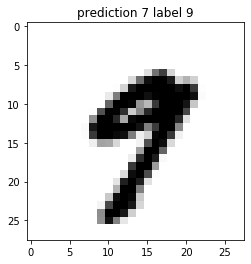

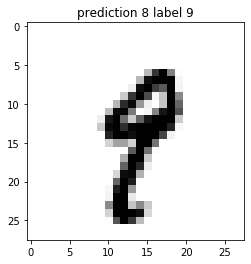

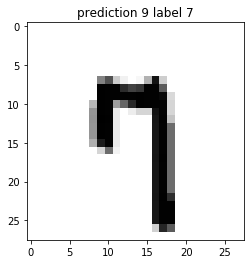

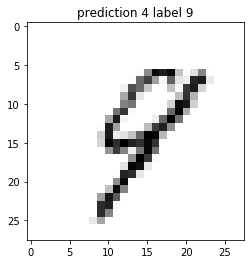

In [0]:
for x in range(100):
  x_train=mnist.test.images[x,:].reshape(1,784)
  y_train=mnist.test.labels[x,:]
  label=y_train.argmax()
  prediction=sess.run(digit_weights,feed_dict={input_images:x_train}).argmax()

  if(prediction!=label):
    plt.title("prediction %d label %d"%(prediction,label))
    plt.imshow(x_train.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
    plt.show()





For 512 hidden nodes, learning rate 0.5, accuracy is 92.73 after 2000 epoch.  92.64 with 0.9 learning rate 93.57 with 0.3 learning rate.  With 712 hidden nodes with 2900 epoch 95% accuracy 4000 epoch 94.93

Strange case with 1000 hidden neurons 0.3 learning rate after alternate epoch increase-decrease max accuracy at 3700 epoch 95.58 
with 1000 hn 0.6 learning rate till 2000 epoch accuracy linearly increase 93.45 @2000, max of 3000 is 93.88 @2900 93.58 @3000 epochs.

After re running same code @2000 :- 93.52, @3000 :- 93.89, @2900 :- 94% 

Again re-run @1900 :- 93.16  @3000:-93.56

-X-X-X-X-END-X-X-X-X-X